In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/ML_CD/insurance.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.head(7)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960


In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.shape

(1338, 7)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

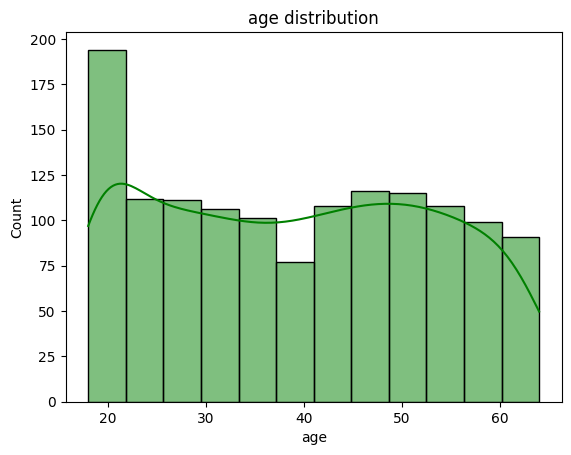

In [ ]:
sns.histplot(data['age'],kde=True,color='green')
sns.set_theme(style="darkgrid")
plt.title('age distribution')
plt.show()

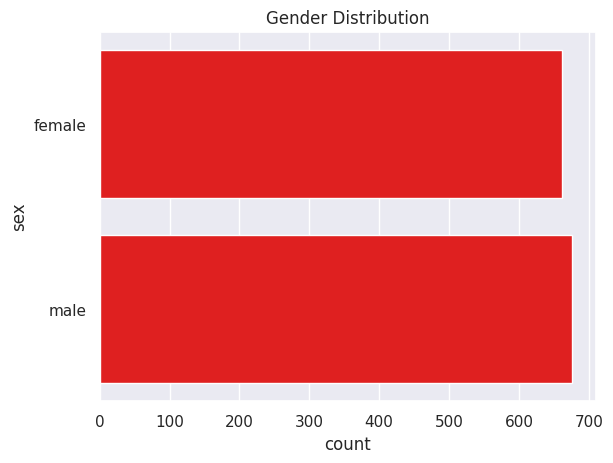

In [ ]:
sns.countplot(data['sex'],color='red')
sns.set_theme(style="darkgrid")
plt.title('Gender Distribution')
plt.show()

In [ ]:
data["sex"].value_counts()

,count
sex,
male,676
female,662


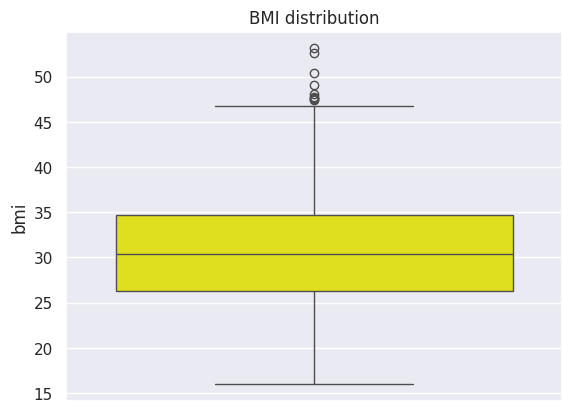

In [ ]:
sns.boxplot(data['bmi'],color='yellow')
plt.title('BMI distribution')
plt.show()

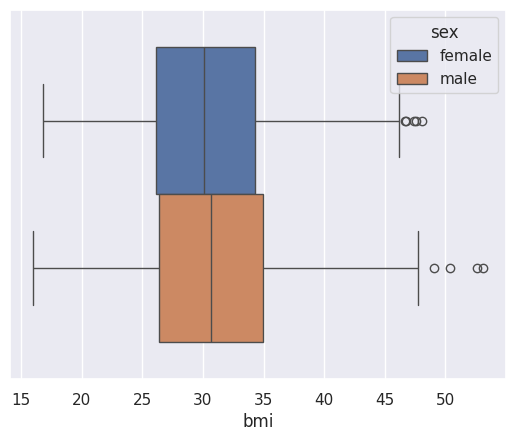

In [ ]:
sns.boxplot(data=data,x="bmi", hue="sex")
plt.show()

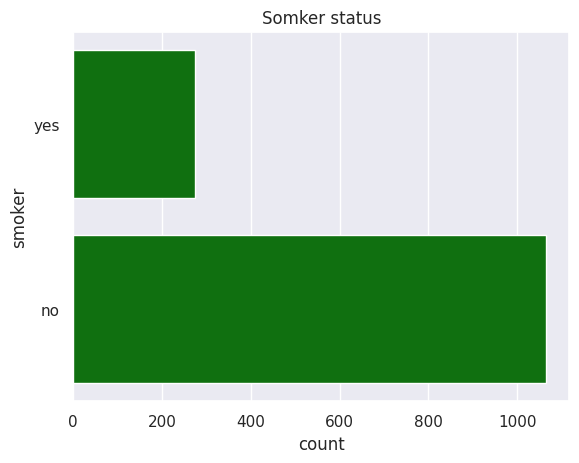

In [ ]:
sns.countplot(data["smoker"],color="green")
sns.set_theme(style="darkgrid")
plt.title("Somker status")
plt.show()

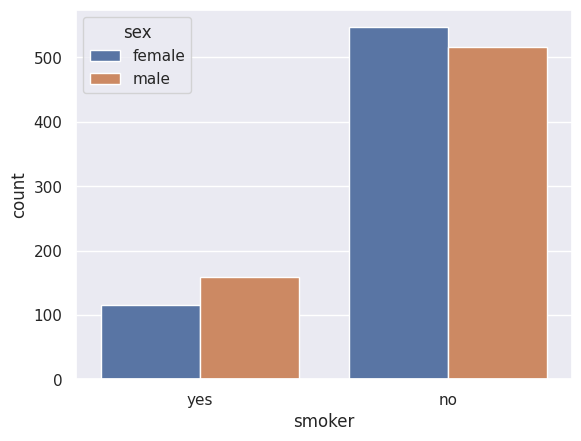

In [ ]:
sns.countplot(data=data,x="smoker", hue="sex")
plt.show()

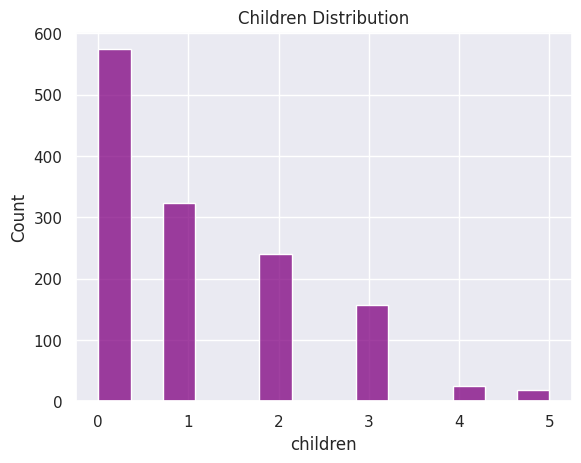

In [ ]:
sns.histplot(data["children"],color='purple')
sns.set_theme(style="darkgrid")
plt.title('Children Distribution')
plt.show()

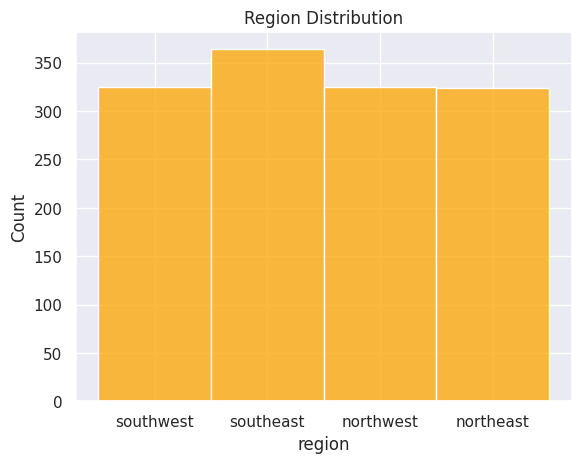

In [ ]:
sns.histplot(data["region"],color='orange')
sns.set_theme(style="darkgrid")
plt.title('Region Distribution')
plt.show()

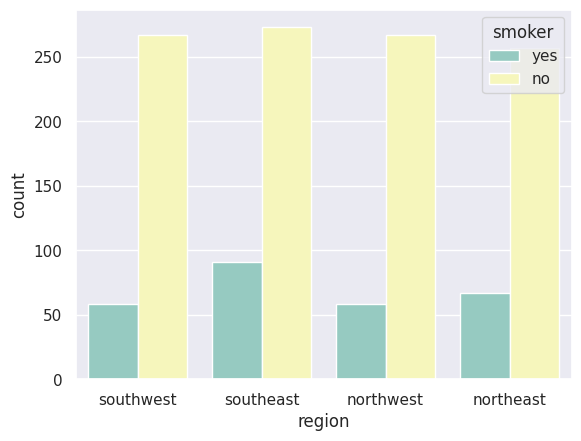

In [ ]:
sns.countplot(data=data,x="region", hue="smoker", palette="Set3")
plt.show()

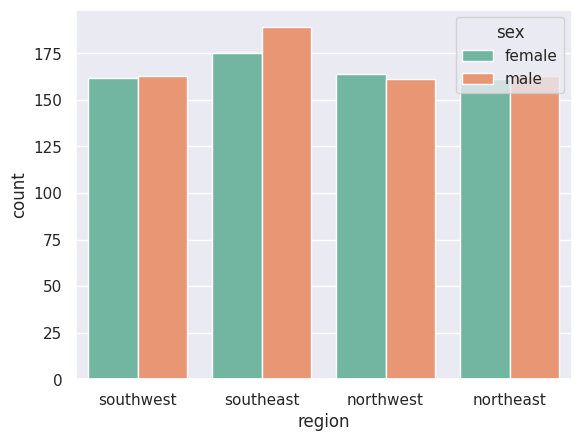

In [ ]:
sns.countplot(data=data,x="region", hue="sex", palette="Set2")
plt.show()

In [ ]:
data.skew(numeric_only=True)

,0
age,0.055673
bmi,0.284047
children,0.938380
charges,1.515880


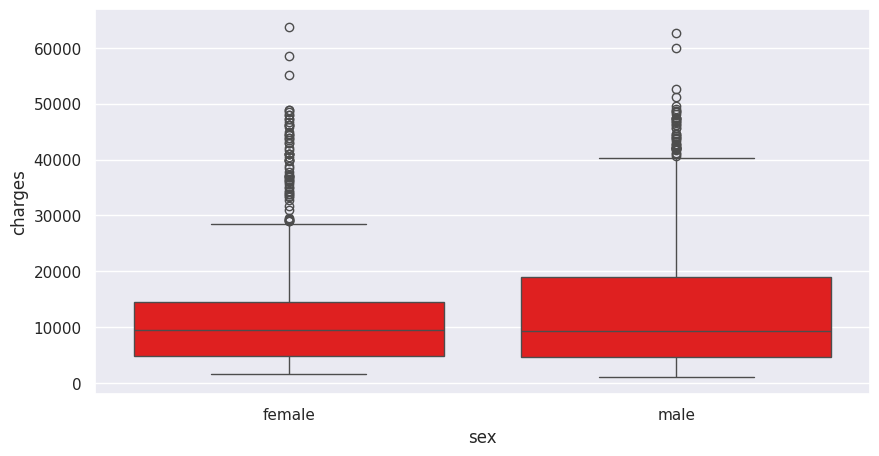

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x="sex",y="charges", color = "red")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
data["sex"]=le.fit_transform(data["sex"])
data["region"]= le.fit_transform(data["region"])
data["smoker"]= le.fit_transform(data["smoker"])

In [ ]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


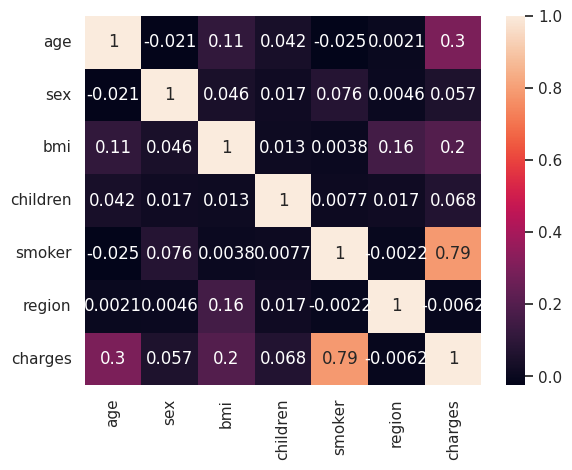

In [ ]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=data.drop("charges",axis=1)
y=data["charges"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("MAE is ",mae)
print("MSE is ",mse)
print("R2 is ",r2)

MAE is  4186.508898366433
MSE is  33635210.431178406
R2 is  0.7833463107364539


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

y_pred_dtr=dtr.predict(x_test)

In [ ]:
mae=mean_absolute_error(y_test,y_pred_dtr)
mse=mean_squared_error(y_test,y_pred_dtr)
r2 = r2_score(y_test,y_pred_dtr)

print("MAE is ",mae)
print("MSE is ",mse)
print("R2 is ",r2)

MAE is  3074.7362741268657
MSE is  46417047.32532817
R2 is  0.7010149656019071


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(x_train,y_train)

y_pred_rfr=rfr.predict(x_test)

In [ ]:
mae=mean_absolute_error(y_test,y_pred_rfr)
mse=mean_squared_error(y_test,y_pred_rfr)
r2 = r2_score(y_test,y_pred_rfr)

print("MAE is ",mae)
print("MSE is ",mse)
print("R2 is ",r2)

MAE is  2533.674643617756
MSE is  21073365.415079337
R2 is  0.8642606273649586


In [ ]:
importances=rfr.feature_importances_
features = x.columns

print(importances)

[0.1345536  0.00641225 0.21629083 0.02019906 0.60861836 0.0139259 ]


In [ ]:
fea_imp= pd.DataFrame({"Feature":features,"Importance":importances})

In [ ]:
fea_imp=fea_imp.sort_values(by="Importance",ascending=False)

In [ ]:
fea_imp.head(6)

,Feature,Importance
4,smoker,0.608618
2,bmi,0.216291
0,age,0.134554
3,children,0.020199
5,region,0.013926
1,sex,0.006412


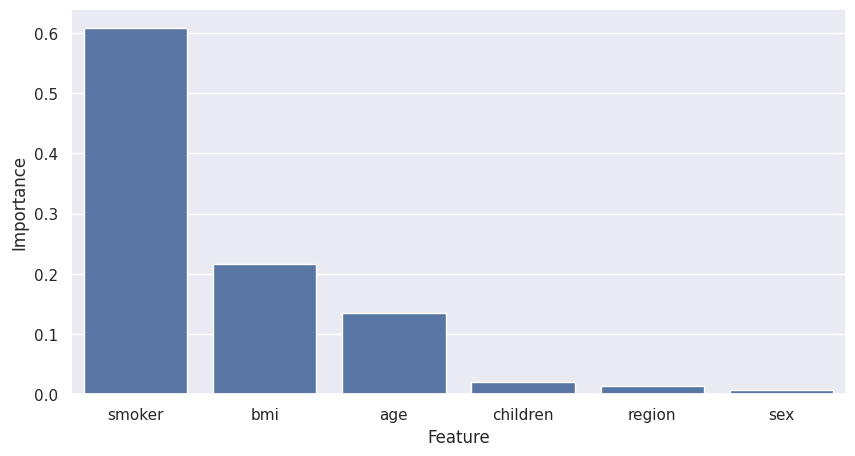

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=fea_imp,x="Feature",y="Importance")
plt.show()

In [ ]:
import joblib

In [ ]:
joblib.dump(data,"medical_prediction.pkl")

['medical_prediction.pkl']

In [ ]:
from google.colab import files
files.download("medical_prediction.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

To save the trained `RandomForestRegressor` model (`rfr`) for deployment, you should use `joblib.dump` on the `rfr` object itself.

In [ ]:
import joblib

# Save the trained Random Forest Regressor model
joblib.dump(rfr, 'random_forest_model.pkl')

print("Trained Random Forest Regressor model saved as 'random_forest_model.pkl'")

Trained Random Forest Regressor model saved as 'random_forest_model.pkl'


You can now download this `random_forest_model.pkl` file for deployment.

In [ ]:
from google.colab import files
files.download('random_forest_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>